<a href="https://colab.research.google.com/github/juangui96/DS-_-Boot-Camp/blob/main/Proyecto_Avance__II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Set: Super Store**


Objetivo: Predecir cuales seran las ventas en los proximos periodos de tiempo de los principales clientes, zonas y categoria de productos que se tiene en el momento partiendo de una definicion de estado actual de las ventas.  

# Cargue Librerias


In [ ]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Librerias Plotly
! pip install chart_studio
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 603.3 kB/s eta 0:00:00


Antes de realizar el analisis exploratorio de los datos y explicar el porque se ha seleccionado este data frame, deben cargarse e instalarse las librerias necesarias para realizar las visualizaciones

# Analisis Exploratorio


Lo primero que se realiza es cargar el dataframe seleccionado a partir de:


```
#Cargar base
url = 'https://raw.githubusercontent.com/juangui96/DS-_-Boot-Camp/main/Proyecto_Final/Actividad_1/super%20Store%20.csv'
ss = pd.read_csv(url, sep = ';')
ss.head()
```
Seguidamente se encontrara informacion valiosa sobre el tamaño del dataframe, su contenido, el tipo de dato y algunas agrupaciones que se realizan para darse una idea sobre como puede trabajarse con el data set


In [ ]:
#Cargar base
url = 'https://raw.githubusercontent.com/juangui96/DS-_-Boot-Camp/main/Proyecto_Final/Actividad_1/super%20Store%20.csv'
ss = pd.read_csv(url, sep = ';')
ss.head()

El DF con el que se esta trabajando presenta 9799 registros, cada uno es una venta la cual se expresa en dolares. De cada una de ella se disponen 19 columnas las cuales registran un mayor detalle de cada una:


```
Nombre de las columnas: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Sales2'])

```



In [132]:
#tamaño del DF
ss.shape

(9799, 19)

In [133]:
#nombre de las columnas
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Sales2'],
      dtype='object')

En su mayoria el tipo de datos corresponde a "Object", 2 variables corresponden a tipo "Float". Como se puede ver no hay registros nulos, es decir, el dataframe dispone de su informacion completa.



In [134]:
#informacion general de los datos
ss.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales             object
Sales2           float64
dtype: object

In [ ]:
#validacion de nulos
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9799 non-null   int64  
 1   Order ID       9799 non-null   object 
 2   Order Date     9799 non-null   object 
 3   Ship Date      9799 non-null   object 
 4   Ship Mode      9799 non-null   object 
 5   Customer ID    9799 non-null   object 
 6   Customer Name  9799 non-null   object 
 7   Segment        9799 non-null   object 
 8   Country        9799 non-null   object 
 9   City           9799 non-null   object 
 10  State          9799 non-null   object 
 11  Postal Code    9788 non-null   float64
 12  Region         9799 non-null   object 
 13  Product ID     9799 non-null   object 
 14  Category       9799 non-null   object 
 15  Sub-Category   9799 non-null   object 
 16  Product Name   9799 non-null   object 
 17  Sales          9794 non-null   object 
dtypes: float

Finalmente se realiza una agrupacion basica, para entender como pueden realizarse futuros procesamientos, los cuales son necesarios para crear  visualizaciones. Se resalta que:


*   Para la variable segmento existen tres tipos de categoria: Consumer, Corporate y Home Office
*   Para la variable Ship Mode se tiene: First Class, Same Day, Second Class y Standard Class.
*   Existen 4 regiones, las cuales su vez se dividen por ciudad (city) y estado (state). Todas comparten el mismo pais: Estados Unidos
*   Se tiene una gran lista de 793 clientes, cada uno identificado por nombre y su correspondiente ID
*   Los productos se encuentran categorizados en: Category (Furniture, Office Supplies y Technology) y Sub-Category



In [ ]:
#Entendimiento de columnas
ss.groupby(['Ship Mode','Segment']).count()['Row ID']

Ship Mode       Segment    
First Class     Consumer        755
                Corporate       468
                Home Office     278
Same Day        Consumer        312
                Corporate       114
                Home Office     112
Second Class    Consumer       1003
                Corporate       588
                Home Office     310
Standard Class  Consumer       3031
                Corporate      1782
                Home Office    1046
Name: Row ID, dtype: int64

In [ ]:
ss.groupby(['Region','Category']).count()['Row ID']

Region   Category       
Central  Furniture           470
         Office Supplies    1399
         Technology          407
East     Furniture           591
         Office Supplies    1667
         Technology          527
South    Furniture           326
         Office Supplies     983
         Technology          289
West     Furniture           691
         Office Supplies    1860
         Technology          589
Name: Row ID, dtype: int64

In [137]:
len(ss['Customer Name'].unique())

793

In [144]:
ss.groupby(['Category','Sub-Category']).count()['Row ID']


Category         Sub-Category
Furniture        Bookcases        226
                 Chairs           607
                 Furnishings      931
                 Tables           314
Office Supplies  Appliances       459
                 Art              785
                 Binders         1492
                 Envelopes        248
                 Fasteners        214
                 Labels           357
                 Paper           1338
                 Storage          832
                 Supplies         184
Technology       Accessories      755
                 Copiers           66
                 Machines         115
                 Phones           876
Name: Row ID, dtype: int64

Por ultimo y no menos importante, el formato de sales debe ser "normalizado", dado que viene un formato en donde los dolares estan separados por puntos, lo que genera que python no logre identificarlo como un numero que represente el total de la venta. Por ello, se remplaza el punto y por comodidad se convierte en millones de dolares (Supuesto: Las ventas se expresan en millones de dolares)



In [ ]:
#normalizando el valor de las ventas, sales 2 se expresa en millones de dolares
ss['Sales2']=(ss['Sales'].str.replace('.','')).astype(float)/1000000
ss.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales2
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.026196
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.073194
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,0.001462
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,9.575775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,0.022368


In [ ]:
ss['Sales2'][3]


9.575775

In [ ]:
ss.groupby('Sub-Category').sum()['Sales2']

Sub-Category
Accessories     37.038489
Appliances      25.730640
Art              8.559853
Binders        102.579053
Bookcases      198.019806
Chairs         181.085736
Copiers         63.044102
Envelopes        5.760244
Fasteners        1.065583
Furnishings     27.280390
Labels           2.913647
Machines        59.424089
Paper           23.149226
Phones         160.430598
Storage         64.148985
Supplies        16.637778
Tables         136.495172
Name: Sales2, dtype: float64

De esta manera se evidencia que el total de ventas de 2015 a 2018 fue de 1113.3 millones de dolares

In [149]:
ss['Sales2'].sum()

1113.3633909999999


Se ha seleccionado este set de Datos teniendo en cuenta el alcance y los metodos analiticos que se aplicaran en el curso. Se considera que esta tabla contiene una informacion bastante concisa en cuanto a las ventas de cerca de 4 años de un grupo de tiendas. Como se podra ver mas adelante, este conjunto de datos incluye un nivel de granularidad bastante detallado (Ventas diarias), ademas de una detalle de cada registro bastante completo, incluyendo informacion sobre : Segmento y tipo de Cliente, Clase y SubClase de Producto, informacion geografica de la venta, monto total de la venta entre otros.


# Visualizaciones


La primera grafica que se considera relevante corresponde a identificar cual es el pareto de las ventas por subcategoria. Lo cual corresponde a: Bookcases, Chairs, Phones y Tables. Las ventas de estas 4 categorias corresponden a mas del 60% de las ventas hechas en los 3 años mencionados previamente.

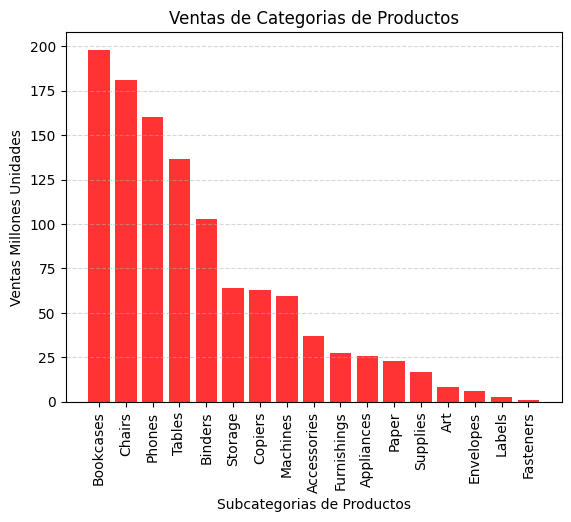

In [ ]:
subcategory = pd.DataFrame(ss.groupby('Sub-Category')['Sales2'].sum().reset_index())
subcategory = subcategory.sort_values(by='Sales2', ascending = False)
plt.bar(subcategory['Sub-Category'],subcategory['Sales2'], color = "red", alpha = 0.8)
plt.ylabel('Ventas Millones Unidades')
plt.xlabel('Subcategorias de Productos')
plt.xticks(rotation = 90)
plt.title('Ventas de Categorias de Productos')
plt.grid(axis = 'y',alpha=0.5, linestyle='--')

La distribucion de la cantidad de ventas demuestra que a pesar que existen productos como los furnishures y papers que son los que mas se venden, no son los que mas ingresos generan. Podria pensarse en aumentar el precio o disminuirlo dependiendo de la competencia para asi abarcar una porcion de mercado mayor. Por su parte, productos como bookcases, chairs muestran una aparente frecuencia de venta media a pesar de que los ingresos por sus ventas son altos. En cuanto a los productos de la cola derecha, se muestra que tienen ingresos medios pero una frecuencia menor de venta

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

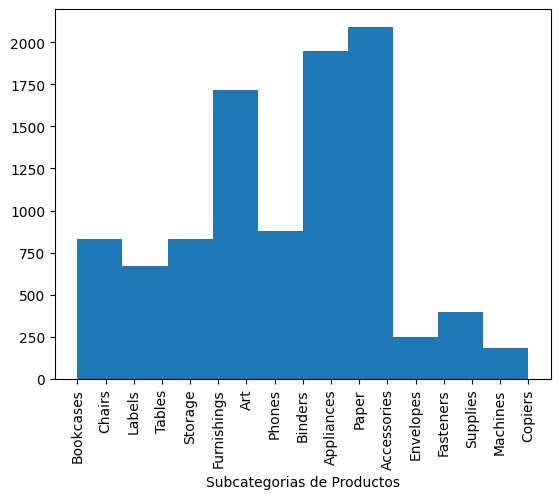

In [ ]:
#Histograma
plt.hist(ss['Sub-Category'])
plt.xlabel('Subcategorias de Productos')
plt.xticks(rotation = 90)

El analisis por segmento, demuestra que el que mayor cantidad de clientes tiene el consumer, seguido del corporate y por ultimo el home office.

Text(0, 0.5, 'Segmento')

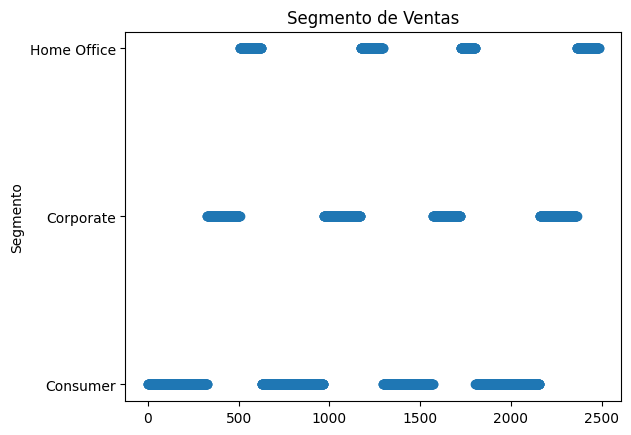

In [154]:
region_ventas = ss.groupby(['Region','Segment','Customer Name']).count()['Sales2'].reset_index()
region_ventas
plt.scatter(range(len(region_ventas)), region_ventas['Segment'], label=" ")
plt.xlabel('')
plt.title('Segmento de Ventas')
plt.ylabel('Segmento')


Las regiones y categorias de los productos tambien pueden analizarse, aparantemente el segmento consumidor, ademas de tener una gran cantidad de clientes es el que mas ingresos genera, seguido de home office y por ultimo corporate. En cuanto a las regiones, la region central parece ser la que mayor ventas tiene, seguida de east.

In [ ]:
r_v = ss.groupby(['Region','Category']).sum()['Sales2'].reset_index()
r_v = ss.groupby(['Region','Category']).sum()['Sales2'].reset_index()
r_v
#eje x
# labels = r_v['Region']
# x = np.arange(len(labels))
# width = 0.25
# plt.bar(x-width, r_v['Category'])

,Region,Category,Sales2
0,Central,Furniture,179.096090
1,Central,Office Supplies,59.236062
2,Central,Technology,76.321988
3,East,Furniture,120.438875
4,East,Office Supplies,79.884717
5,East,Technology,87.309636
6,South,Furniture,71.611445
7,South,Office Supplies,42.222650
8,South,Technology,37.026164
9,West,Furniture,171.734694


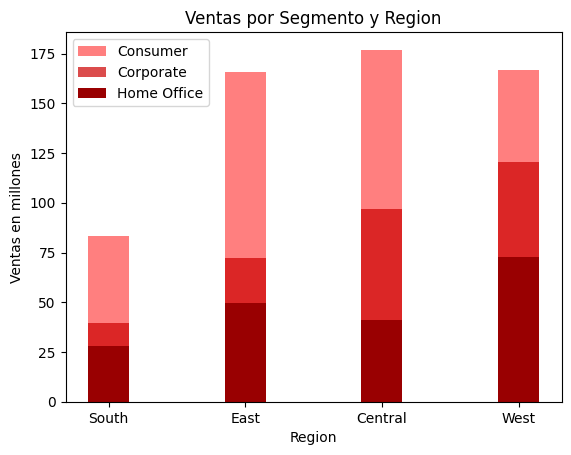

In [ ]:
seg_reg_vta = ss.groupby(['Region', 'Segment']).sum()['Sales2'].reset_index()
piv1 = pd.DataFrame(seg_reg_vta.pivot(index='Region', columns='Segment', values='Sales2').reset_index())
piv1['Total'] = piv1['Consumer']+piv1['Corporate']+piv1['Home Office']
piv1 = piv1.sort_values(by = 'Total', ascending = True)
plt.bar(piv1['Region'],piv1['Consumer'], label = "Consumer", color = '#FF0000', alpha = 0.5, width =0.3)
plt.bar(piv1['Region'],piv1['Corporate'], label = "Corporate", color = '#CC0000', alpha = 0.7, width =0.3)
plt.bar(piv1['Region'],piv1['Home Office'], label = "Home Office", color = '#990001', width =0.3)
plt.title('Ventas por Segmento y Region')
plt.ylabel('Ventas en millones')
plt.xlabel('Region')
plt.legend()

Al revisar la relacion entre Subcategoria y Categoria de producto, podria pensarse que es de tipo uno a uno, sin embargo, al analizar la tabla que se presenta a continuacion junto con la grafica, se puede ver que dentro de la cateogria furniture se comparten productos (Bookcase, Chairs, Table, Furnishing) y que, precisamente, estos son los productos que tienen unos ingreso smayores por ventas.  

In [ ]:
cat_subcat = pd.DataFrame(ss.groupby(['Category','Sub-Category'])['Sales2'].sum().reset_index())
subcateg = ss['Sub-Category'].unique()
x = np.arange(len(subcateg))
pv2 = cat_subcat.pivot(index = 'Category' ,columns='Sub-Category',values = 'Sales2')
pv2

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,198.019806,181.085736,NaN,NaN,NaN,27.28039,NaN,NaN,NaN,NaN,NaN,NaN,136.495172
Office Supplies,NaN,25.73064,8.559853,102.579053,NaN,NaN,NaN,5.760244,1.065583,NaN,2.913647,NaN,23.149226,NaN,64.148985,16.637778,NaN
Technology,37.038489,NaN,NaN,NaN,NaN,NaN,63.044102,NaN,NaN,NaN,NaN,59.424089,NaN,160.430598,NaN,NaN,NaN


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


([<matplotlib.axis.XTick at 0x7fe1825cc370>,
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

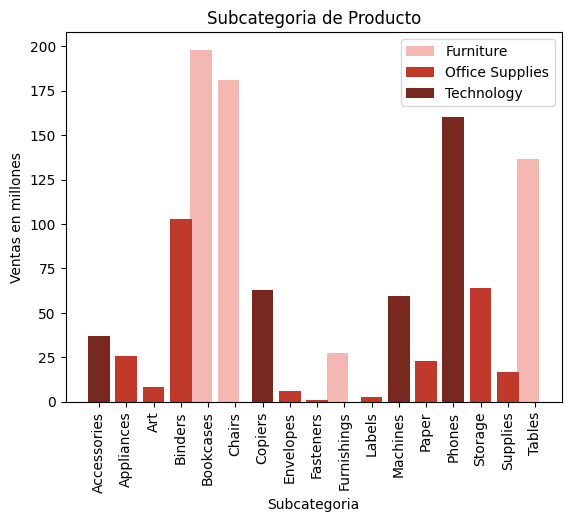

In [155]:
cat_subcat = pd.DataFrame(ss.groupby(['Category','Sub-Category'])['Sales2'].sum().reset_index())
pv2 = cat_subcat.pivot(index = 'Sub-Category', columns = 'Category', values = 'Sales2').reset_index()
labels = pv2['Sub-Category']
x = np.arange(len(labels))
print(x)
w = 0.25
plt.bar(x - w, pv2['Furniture'],label = 'Furniture', color = '#F5B7B1')
plt.bar(x, pv2['Office Supplies'], label = 'Office Supplies', color = '#C0392B')
plt.bar(x, pv2['Technology'], label = 'Technology', color = '#78281F')
plt.title('Subcategoria de Producto')
plt.ylabel('Ventas en millones')
plt.xlabel('Subcategoria')
plt.legend()
plt.xticks(rotation = 90, ticks= x, labels=labels)


### **Libreria** **SNS** **texto en negrita**
**HACER LAS GRAFICAS DE BIGOTES POR SUMA NO SOLO POR VALORES**

La variabilidad en cuanto a las ventas se evidencia, es bastante alta, se tienen bastantes puntos outliers por lo cual, deben retirarse como se muestra en el segundo grafico.

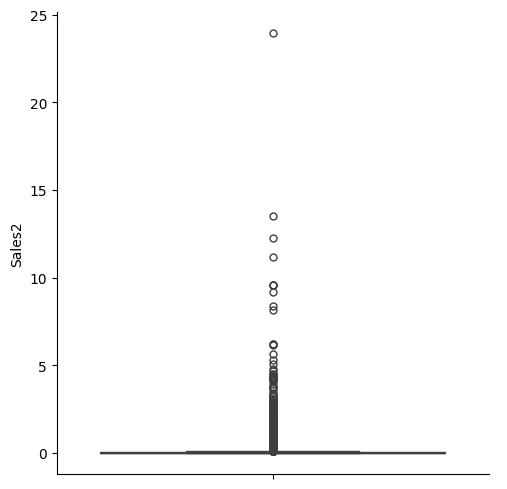

In [ ]:
ax = sns.catplot(y = 'Sales2', data=ss, kind = 'box')

Al quitar los datos atipicos, se evidencia que en general el 50% de las ventas se mueven aproximadamente entre 50 mil y 10 mil dolares. Asi mismo se encuentra que la mayor dispersion de precios de ventas , se encuentra cuando el precio (valga la redundancia) es mayor a 15 mil dolares aproximadamente.

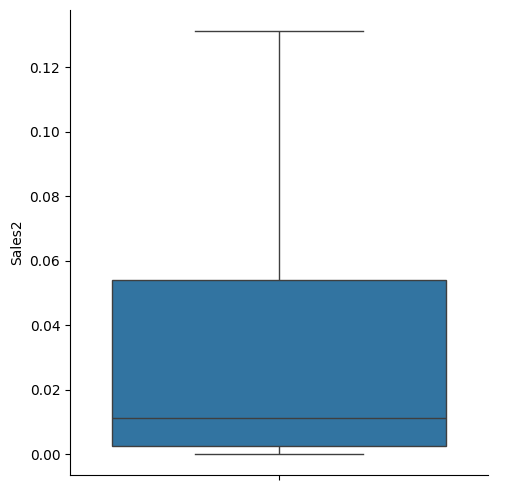

In [ ]:
ax = sns.catplot(y = 'Sales2', data=ss, kind = 'box', showfliers = False)

La region central es la que presenta una mayor cantidad de ventas con valores atipicos, seguida de la region este y sur. Lo anterior se confirmar al revisar las graficas de bigotes (boxplot) por cada region. Se identifica que, la region oeste es la que tiene una caja de mayor tamaño, y que la sur es la que presenta, aparentemente, unos valores mas concentrados. Las 4 regiones siguen el comportamiento previamente descrito en cuanto a la asimetria de los datos.

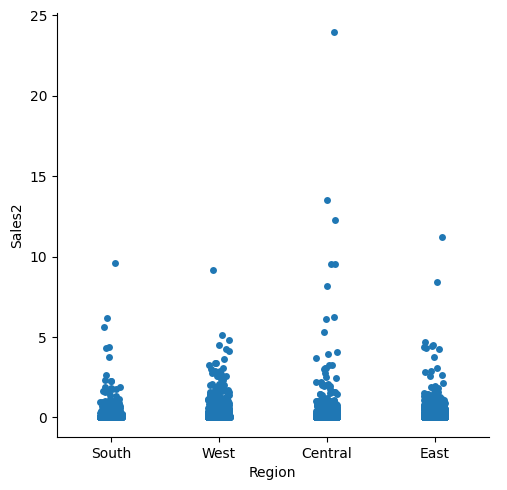

In [156]:
ax = sns.catplot(x = 'Region', y = 'Sales2', data=ss, kind = 'strip')

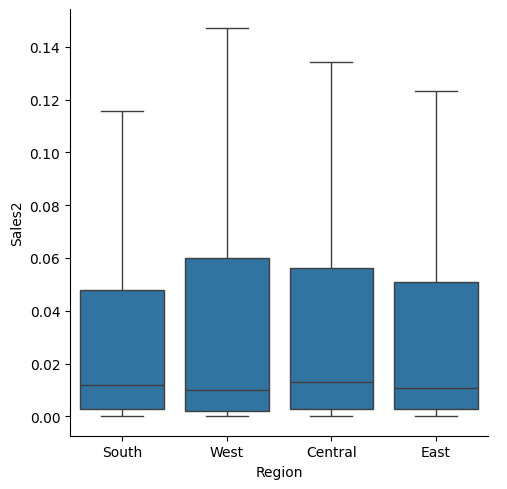

In [ ]:
ax = sns.catplot(x = 'Region', y = 'Sales2', data=ss, kind = 'box', showfliers = False)

Al revisar las categorias de prodcutos, se encuentra que:


1.   Deben ocultarse los outliers ya hay que valores bastantes altos
2.   La region West presenta las cajas de mayor tamaño, (mayor variabilidad) por lo que se cumple lo previamente explicado.
3.   La categoria Office Suppliers es la que presenta una menor variabilidad, se piensa que es debido a que no es el segmento que mas ventas presenta. Por su parte Furniture, dejando de lado la region west, aparentemente es el que presenta un comportamiento menos variable



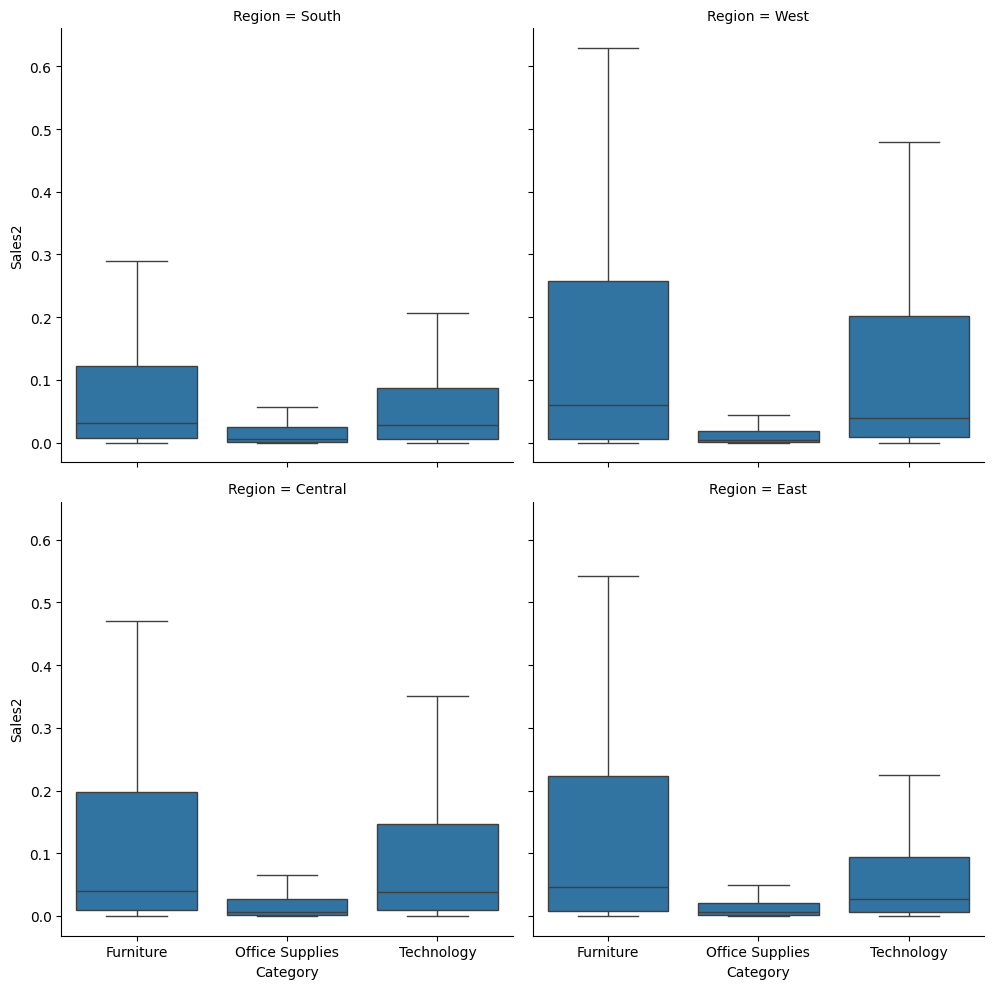

In [ ]:
ax = sns.catplot(x = 'Category', y = 'Sales2', col = 'Region' ,data=ss, kind = 'box', showfliers = False, col_wrap=2)

Con el fin de cumplir con el objetivo principal, se deben realizar analisis sobre el comportamiento temporal de las ventas en el tiemmpo. A nivel general, se identifica que existen picos muy marcados como Agosto 9 de 2017, asi mismo, se puede pensar que hay una tendencia leve a aumentar las ventas pero no se ve una estacionalidad tan marcada.

In [ ]:
from datetime import date, time, datetime

In [ ]:
ss1 = ss[['Order Date','Segment','Sales2']]
ss1 = ss.groupby(['Order Date','Segment'])['Sales2'].sum()
ss1 = pd.DataFrame(ss1.reset_index()).sort_values(by = 'Order Date', ascending = True)
ss1['Order Date 2'] = pd.to_datetime(ss1['Order Date'], format='mixed')
ss1 = ss1.sort_values(by='Order Date 2', ascending = False)
px.line(ss1,x = 'Order Date 2',y = 'Sales2')

Al revisar las ventas por los diferentes segmentos, se evidnecia que no hay una continuidad ennlas ventas, es decir, no en todos los dias de los 4 años del analisis se realizaron ventas de los 3 tipos de segmentos de producto.
Las ventas que predominan corresponden al segmento consumidor y se puede pensar que es el que tiene una mayor continuidad, seguidamente es el corporate.

In [ ]:
px.line(ss2,x = 'Order Date 2',y = ['Consumer','Corporate','Home Office'])

Se puede evidenciar tambien que el segundo semestre del año es el que mayor cantidad de ventas presenta, en especial en lo smeses 10 y 11. Se puede ver que la cantidad de ventas ha aumentado con el tiempo y que el ultimo año y medio (desde 2017) se ha tendido a tener una estabilizacion. El año mas "frio" fue 2016.

In [ ]:
ss2['Month']=ss2['Order Date 2'].dt.month
ss2['Year']=ss2['Order Date 2'].dt.year
px.density_heatmap(ss2,x='Year',y='Month',z='Sales 2', marginal_y = 'histogram')

Esta grafica permite afirmar lo que se dijo previamente, el año 2016 es el que menos ventas ha presentado y que el 2018 y 2017 presentan un comportamiento "similar". Se evidencia que los meses de octubre, han sido , en general, meses en donde han habido picos negativos sin embargo, en el año 2018 se evidencia un incremento importante en el valor de ventas totales

In [97]:
ss3 = pd.DataFrame(ss2.groupby(['Month','Year'])['Sales 2'].sum().reset_index())
ss4 = pd.DataFrame(ss3.pivot(index='Month',columns='Year',values='Sales 2').reset_index())
px.line(ss4,x='Month',y=[2015, 2016, 2017, 2018],)

In [130]:
ss5 = pd.DataFrame(ss.groupby(['State','Segment','Customer ID'])['Sales2'].sum().reset_index())
#ss5 = pd.DataFrame((ss5.pivot(index=['Segment','State'], columns='Category',values='Sales2').reset_index()))
ss5

,State,Segment,Customer ID,Sales2
0,Alabama,Consumer,AH-10465,0.001494
1,Alabama,Consumer,AM-10705,0.126414
2,Alabama,Consumer,BF-11080,0.001467
3,Alabama,Consumer,CB-12025,0.023992
4,Alabama,Consumer,DC-12850,0.001248
...,...,...,...,...
4003,Wisconsin,Home Office,PA-19060,0.009168
4004,Wisconsin,Home Office,PO-19180,0.039995
4005,Wisconsin,Home Office,PV-18985,0.049032
4006,Wisconsin,Home Office,SS-20515,0.004797


Finalmente, es importante visualizar quienes son los clientes que generan mas ingresos por ventas, el cliente con ID: 10675, muestra unas ventas totales por 24 millones en la region de texas para el mercado consumidor. Seguidamente se encuentra el cliente 12715, tambien en texas pero en el segmento coporate con compras totales por 13 millones. Se puede ver que, este grafico muestra las clientes por region que tienen mayores ventas

In [131]:
px.scatter(ss5, x='State', y='Sales2', color='Segment', size='Sales2',hover_data=['Customer ID'])